<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [178]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scipy as scp

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [179]:
# check the iowa file location for your computer 
iowa_file = '../../datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [180]:
# Please refet to every cell in this part.
#I used different cells to make it easy to read

#Gives info about data types and count of non-null values of each column
print iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [181]:
#Gives basic stats info (min,max,mean,std,max values etc.)
print iowa.describe()

        Store Number  County Number      Category  Vendor Number  \
count  270955.000000  269878.000000  2.708870e+05   270955.00000   
mean     3590.263701      57.231642  1.043888e+06      256.43443   
std       947.662050      27.341205  5.018211e+04      141.01489   
min      2106.000000       1.000000  1.011100e+06       10.00000   
25%      2604.000000            NaN           NaN      115.00000   
50%      3722.000000            NaN           NaN      260.00000   
75%      4378.000000            NaN           NaN      380.00000   
max      9023.000000      99.000000  1.701100e+06      978.00000   

         Item Number  Bottle Volume (ml)   Bottles Sold  Volume Sold (Liters)  \
count  270955.000000       270955.000000  270955.000000         270955.000000   
mean    45974.963300          924.830341       9.871285              8.981351   
std     52757.043086          493.088489      24.040912             28.913690   
min       168.000000           50.000000       1.000000        

In [182]:
#Prints the first 5 row of entire data
iowa.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


In [183]:
#Prints the column names
print iowa.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

### 3.2 Clean the columns

In [184]:
#Convert the cost values to float and delete the $ at the beginning

#I did 3.1 and 3.2 all together !

iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
iowa["Sale (Dollars)"] = iowa["Sale (Dollars)"].astype(float)

iowa["State Bottle Cost"] = iowa["State Bottle Cost"].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
iowa["State Bottle Cost"] = iowa["State Bottle Cost"].astype(float)

iowa["State Bottle Retail"] = iowa["State Bottle Retail"].map(lambda x: x.lstrip('$').rstrip('aAbBcC'))
iowa["State Bottle Retail"] = iowa["State Bottle Retail"].astype(float)

In [185]:
#Null values were replaced with the same type of data in a way that 
#would be indentical and would be ignored when plotted

iowa.County.fillna("Unknown County")
iowa['County Number'].fillna(-1.0)
iowa['Category Name'].fillna("");

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [248]:
#'Volume Sold (Liters)', 'Bottle Volume (ml)', 'Item Description','Category','County Number'
#There columns are either repesented by other columns or not really useful for stats

iowa = iowa.drop(['Volume Sold (Liters)','Item Description','Category','County Number'], axis=1)


iowa.head()

ValueError: labels ['Volume Sold (Liters)' 'Item Description' 'Category' 'County Number'] not contained in axis

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [249]:
iowa['Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost']) * iowa['Bottles Sold']



In [187]:
#I decided to delete all of the rows with the value the date between '2015-1-1'  '2015-12-1' assuming that
#those dates were opening dates

In [188]:
iowa.Date = pd.to_datetime(iowa.Date)
iowa['Year'] = iowa.Date.dt.year 
iowa['Month'] = iowa.Date.dt.month
iowa['Day'] = iowa.Date.dt.dayofweek


In [189]:
#Getting only the year to delete 2016 from the data set

from datetime import datetime

### Filter Based on the dates

df_test = iowa.groupby(['Store Number'])['Date'].agg([np.min,np.max]).reset_index()

df_test = df_test[ (df_test['amin'] < datetime(2015,1,31))  &  (df_test['amax'] > datetime(2015,12,1) )]

iowa_2015 = iowa [ iowa ['Store Number'].isin(df_test['Store Number'])]

iowa_2015.head()

,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Year,Month,Day
0,2015-11-04,3717,SUMNER,50674,Bremer,APRICOT BRANDIES,55,54436,750,4.50,6.75,12,81.00,2.38,2015,11,2
1,2016-03-02,2614,DAVENPORT,52807,Scott,BLENDED WHISKIES,395,27605,750,13.75,20.63,2,41.26,0.40,2016,3,2
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,STRAIGHT BOURBON WHISKIES,65,19067,1000,12.59,18.89,24,453.36,6.34,2016,2,3
3,2016-02-03,2501,AMES,50010,Story,AMERICAN COCKTAILS,395,59154,1750,9.50,14.25,6,85.50,2.77,2016,2,2
4,2015-08-18,3654,BELMOND,50421,Wright,VODKA 80 PROOF,297,35918,1750,7.20,10.80,12,129.60,5.55,2015,8,1


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [190]:
iowa_2015 = iowa_2015.sort_values(by= "Store Number")

iowa_2015.groupby(["Store Number"])['Sale (Dollars)'].sum().reset_index().sort_values(by= 'Sale (Dollars)', ascending= False ).head()



,Store Number,Sale (Dollars)
122,2633,1220335.09
911,4829,1089152.87
34,2512,532265.62
177,3385,506589.09
183,3420,402576.06


### 5.2 Calculate the profit each store is making in 2015.


In [191]:
iowa_2015['Profit'] = (iowa_2015['State Bottle Retail'] - iowa_2015['State Bottle Cost']) * iowa_2015['Bottles Sold']

iowa_2015.groupby(["Store Number"])['Profit'].sum().reset_index().head()

,Store Number,Profit
0,2106,59027.76
1,2113,3802.53
2,2130,46613.49
3,2152,3048.97
4,2178,10034.46


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [192]:
iowa_2015_by_county = iowa_2015.groupby(["County"])['Profit'].sum()

iowa_2015_by_county_gallon= iowa_2015.groupby(["County"])['Volume Sold (Gallons)'].sum()

profit_per_gallon = iowa_2015_by_county / iowa_2015_by_county_gallon


profit_per_gallon.sort_values(ascending = False).head()


#profit_per_gallon = profit_per_gallon.sort_values(ascending = False).reset_index()

#profit_per_gallon.columns = ['County', 'Profit' ]


County
Dallas       21.400235
Johnson      20.257349
Polk         19.733426
Jefferson    19.168243
Scott        19.160091
dtype: float64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

In [193]:
#clean_iowa['Category Name'].unique()



### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [194]:
#print clean_iowa_profit_by_county_gallon.sort_values(ascending = False)
#print clean_iowa_profit_by_county.sort_values(ascending = False)

new_frame = pd.DataFrame(data = [iowa_2015_by_county_gallon,iowa_2015_by_county,profit_per_gallon])
new_frame = new_frame.transpose()
new_frame.columns = [ 'Volume Sold (Gallons)', 'Profit', 'Profit_Per_Gallon']


new_frame.corr()

,Volume Sold (Gallons),Profit,Profit_Per_Gallon
Volume Sold (Gallons),1.000000,0.999092,0.460036
Profit,0.999092,1.000000,0.464280
Profit_Per_Gallon,0.460036,0.464280,1.000000


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

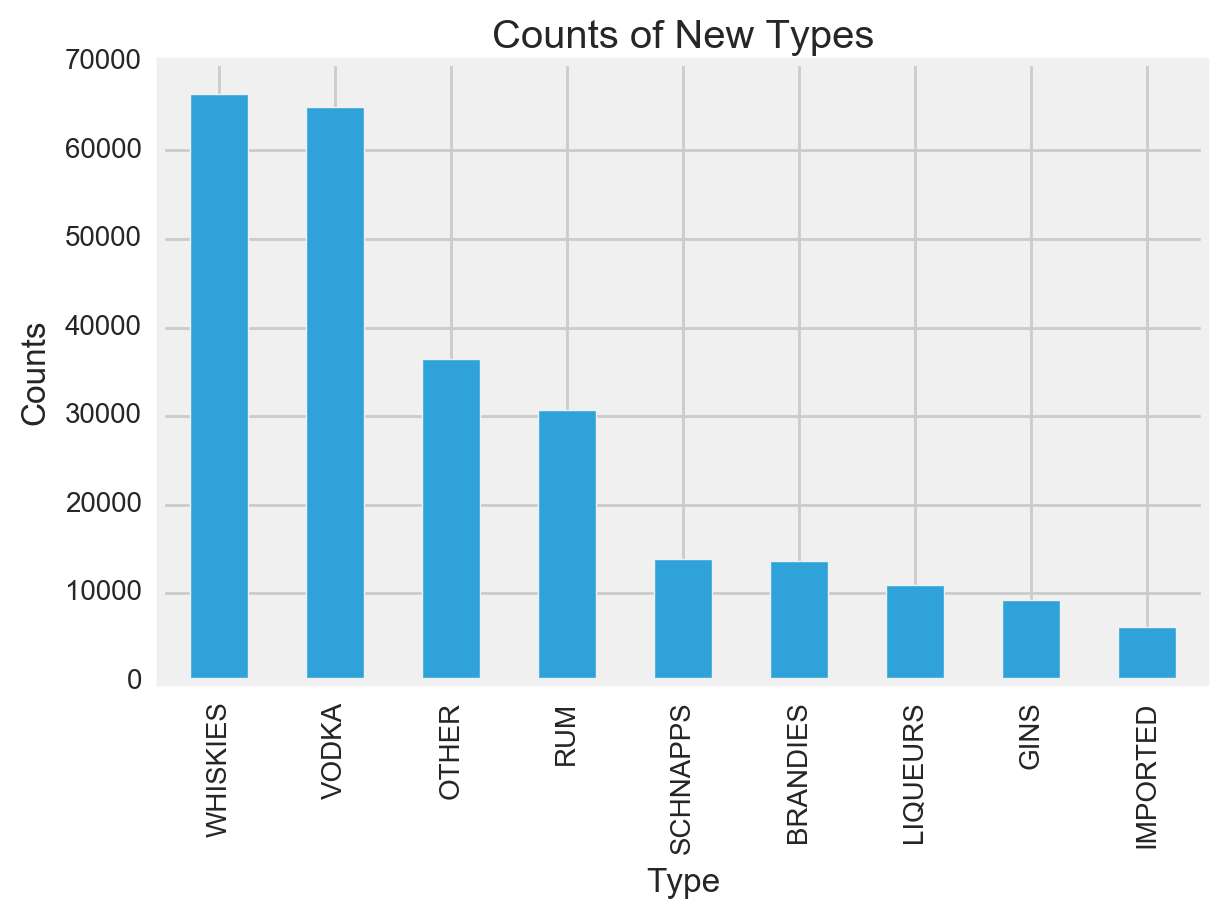

In [195]:

#print "Here they are",clean_iowa['Category Name'].value_counts().head(5)
problems = []

def my_new_cat_maker(cat):
    try:
        if 'SCHNAPPS' in cat:
            return 'SCHNAPPS'
        elif 'VODKA' in cat: 
            return 'VODKA'
        elif 'RUM' in cat:
            return 'RUM'
        elif 'WHISKIES'  in cat:
            return 'WHISKIES'
        elif 'GINS' in cat:
            return 'GINS'
        elif 'BRANDIES' in cat:
            return 'BRANDIES'
        elif 'IMPORTED' in cat:
            return 'IMPORTED'
        elif 'LIQUEURS' in cat:
            return 'LIQUEURS'
        elif 'WHISKY' in cat:
            return 'WHISKIES'
        else: 
            return 'OTHER'
        
    except:
        problems.append(cat)
    
iowa_2015['Larger_Category_Name'] = iowa_2015['Category Name'].apply(my_new_cat_maker)
iowa_2015['Larger_Category_Name'].value_counts().plot(kind='bar')
plt.title('Counts of New Types')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()

### 5.7 Do relationships exist between the broader liquor type and profit?

'From the plot above, we can seee that vodka and whiskey has a lot more profit than over all'

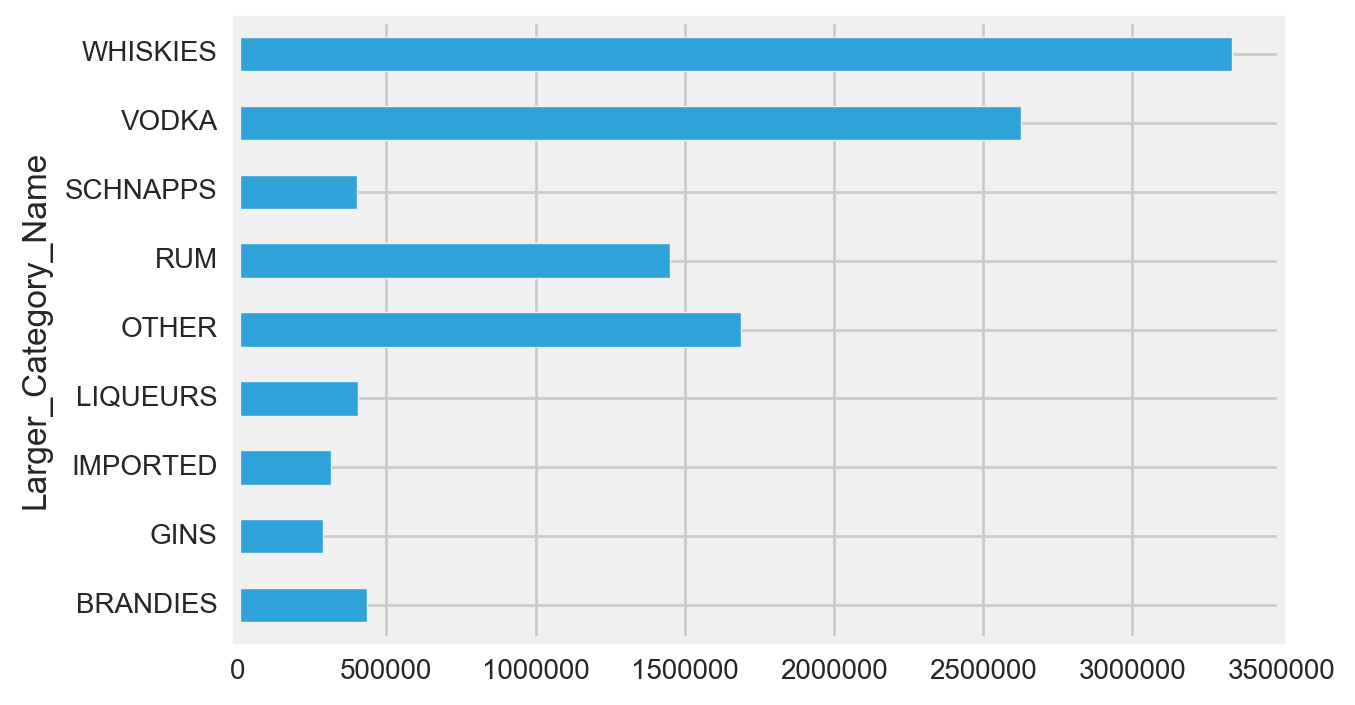

In [196]:
iowa_2015.groupby(["Larger_Category_Name"])['Profit'].sum().plot(kind= 'barh')



'''From the plot above, we can seee that vodka and whiskey has a lot more profit than over all'''

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [197]:
'''

We could have more tax on wiskiy and vodka, thereby small busninesses where they dont sell those as much
, wouldnt get affected but big stores would.

'''

'\n\nWe could have more tax on wiskiy and vodka, thereby small busninesses where they dont sell those as much\n, wouldnt get affected but big stores would.\n\n'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


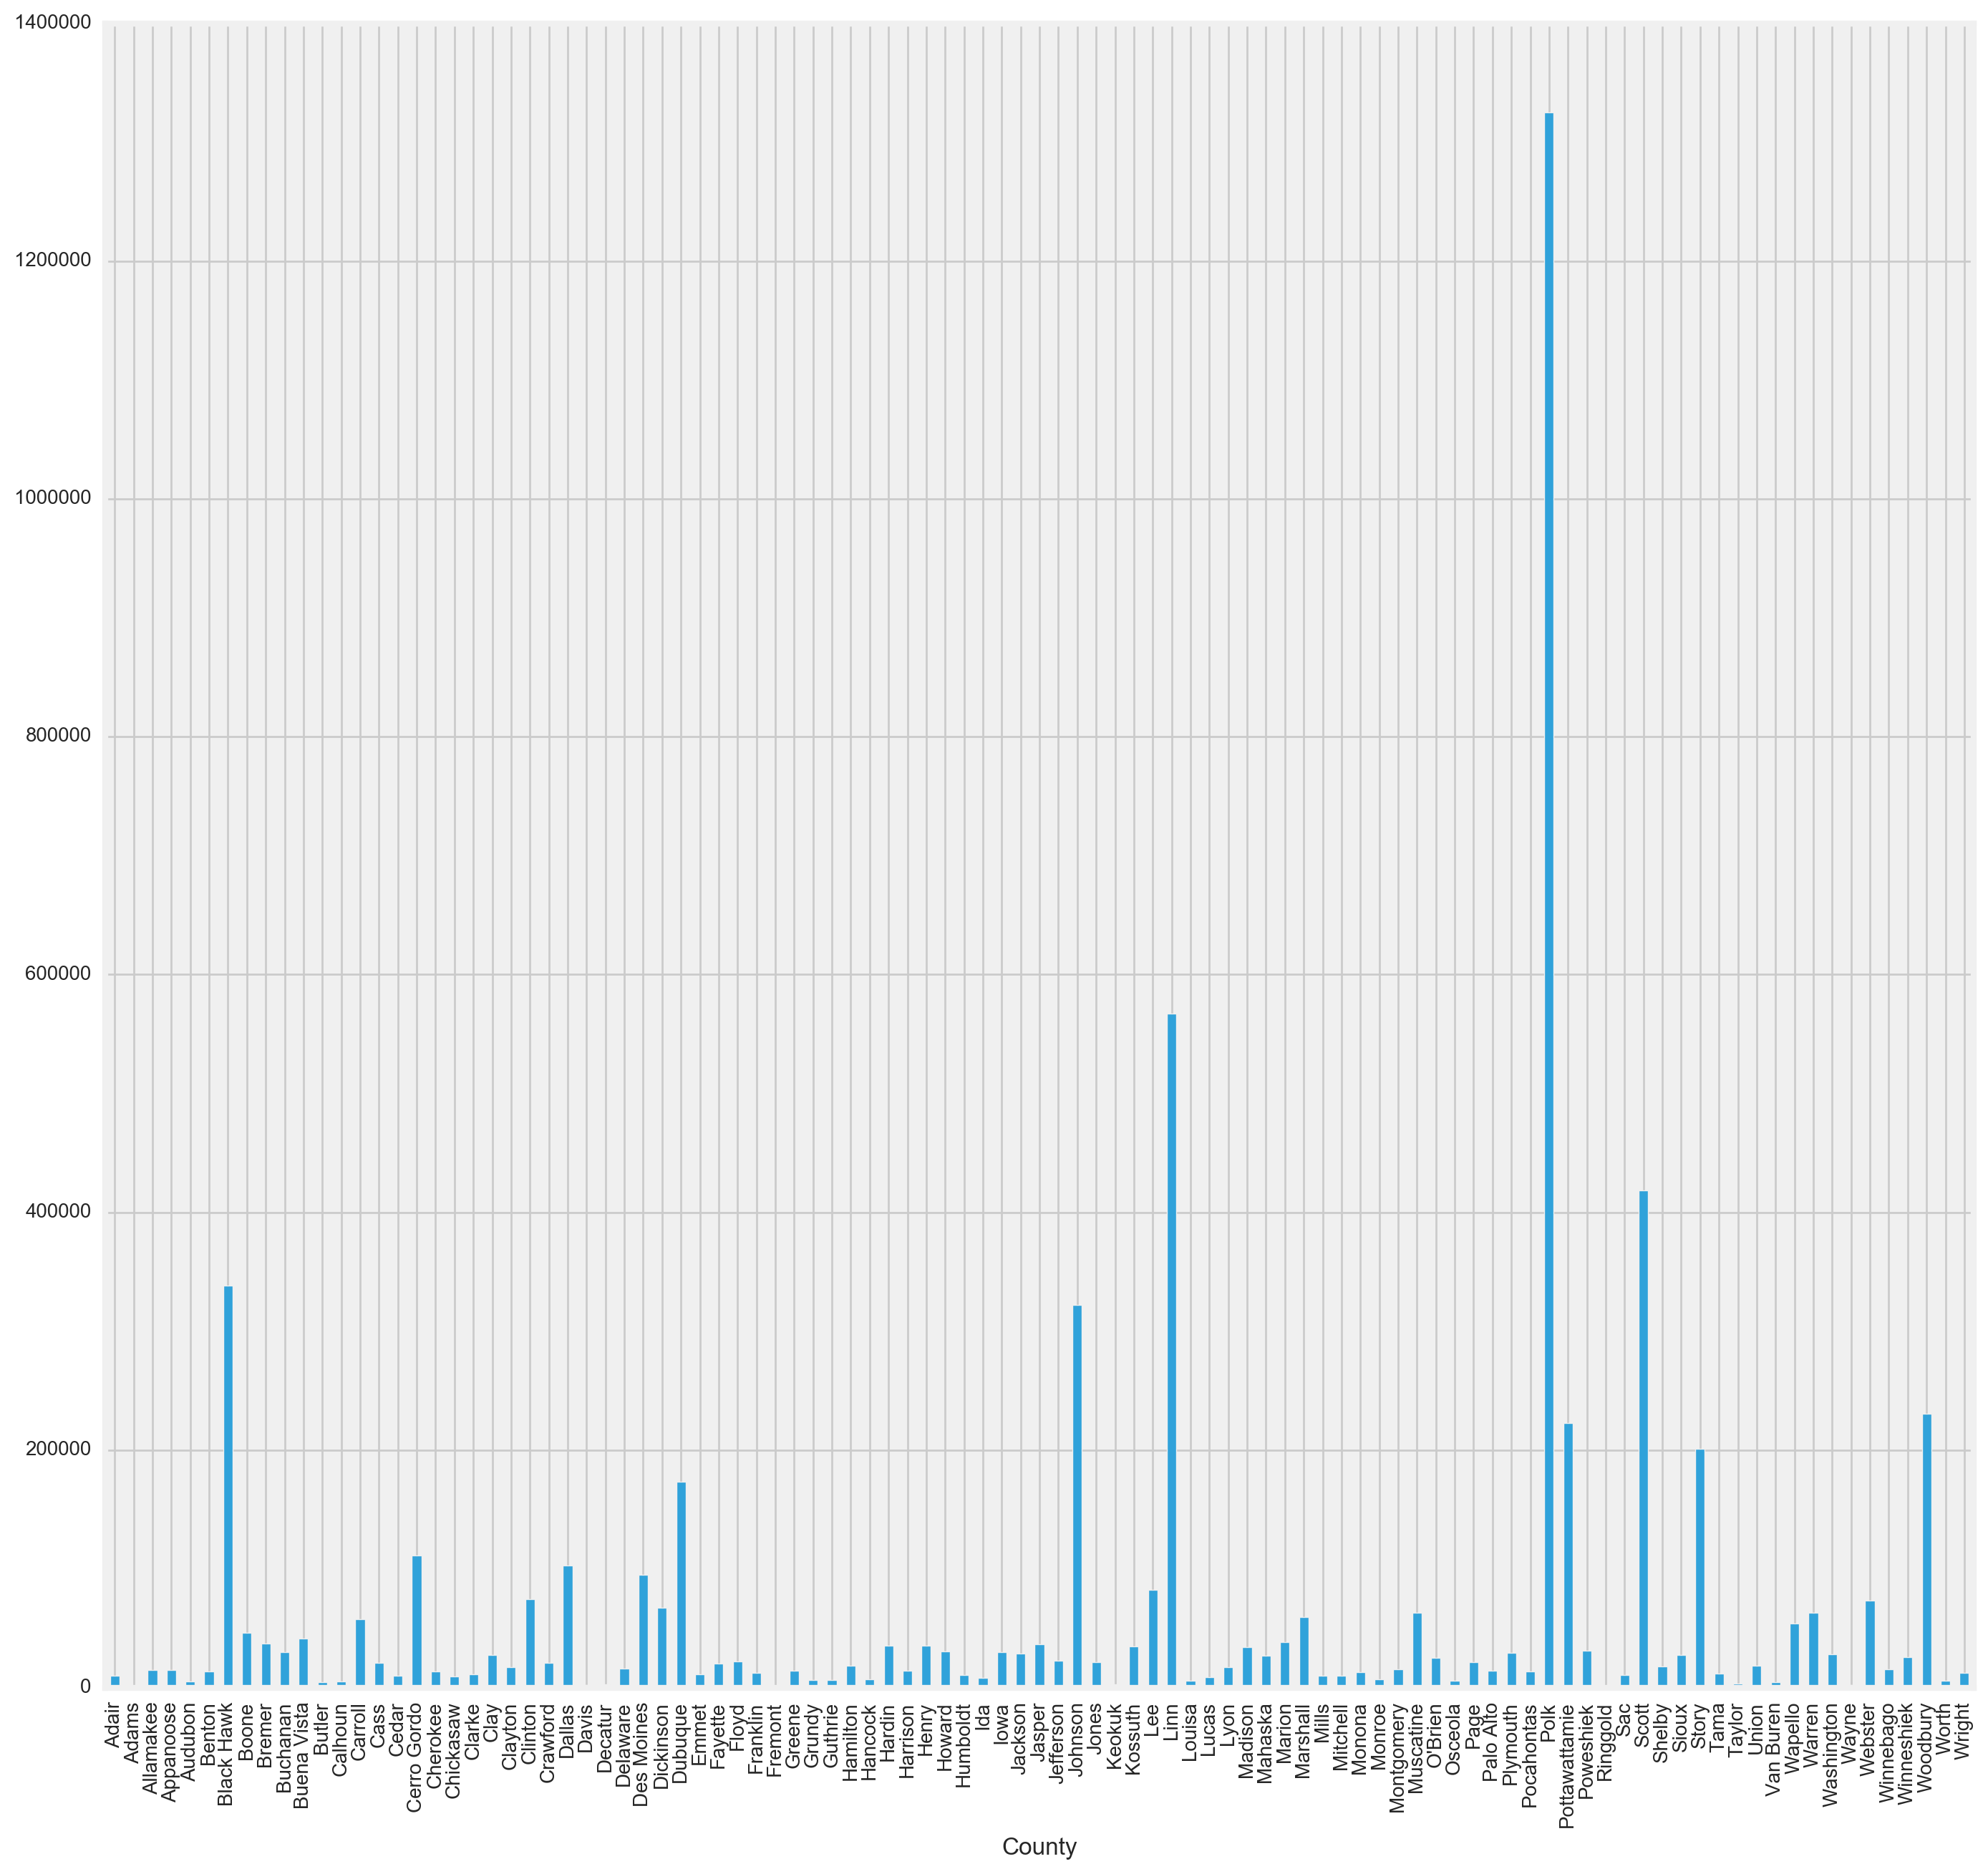

In [198]:
iowa['Larger_Category_Name'] = iowa['Category Name'].apply(my_new_cat_maker)


Sc2_2015 = iowa[(iowa['Date'] > '2015-1-1')  & (iowa['Date'] <'2015-3-31') ]

test1 = Sc2_2015.groupby(['County'])['Sale (Dollars)'].sum().reset_index()

Sc2_2015.groupby(['County'])['Sale (Dollars)'].sum().plot(kind='bar',figsize = (15,15));


#Difference between sales for 15 to 16, make sure each county show up in both year 

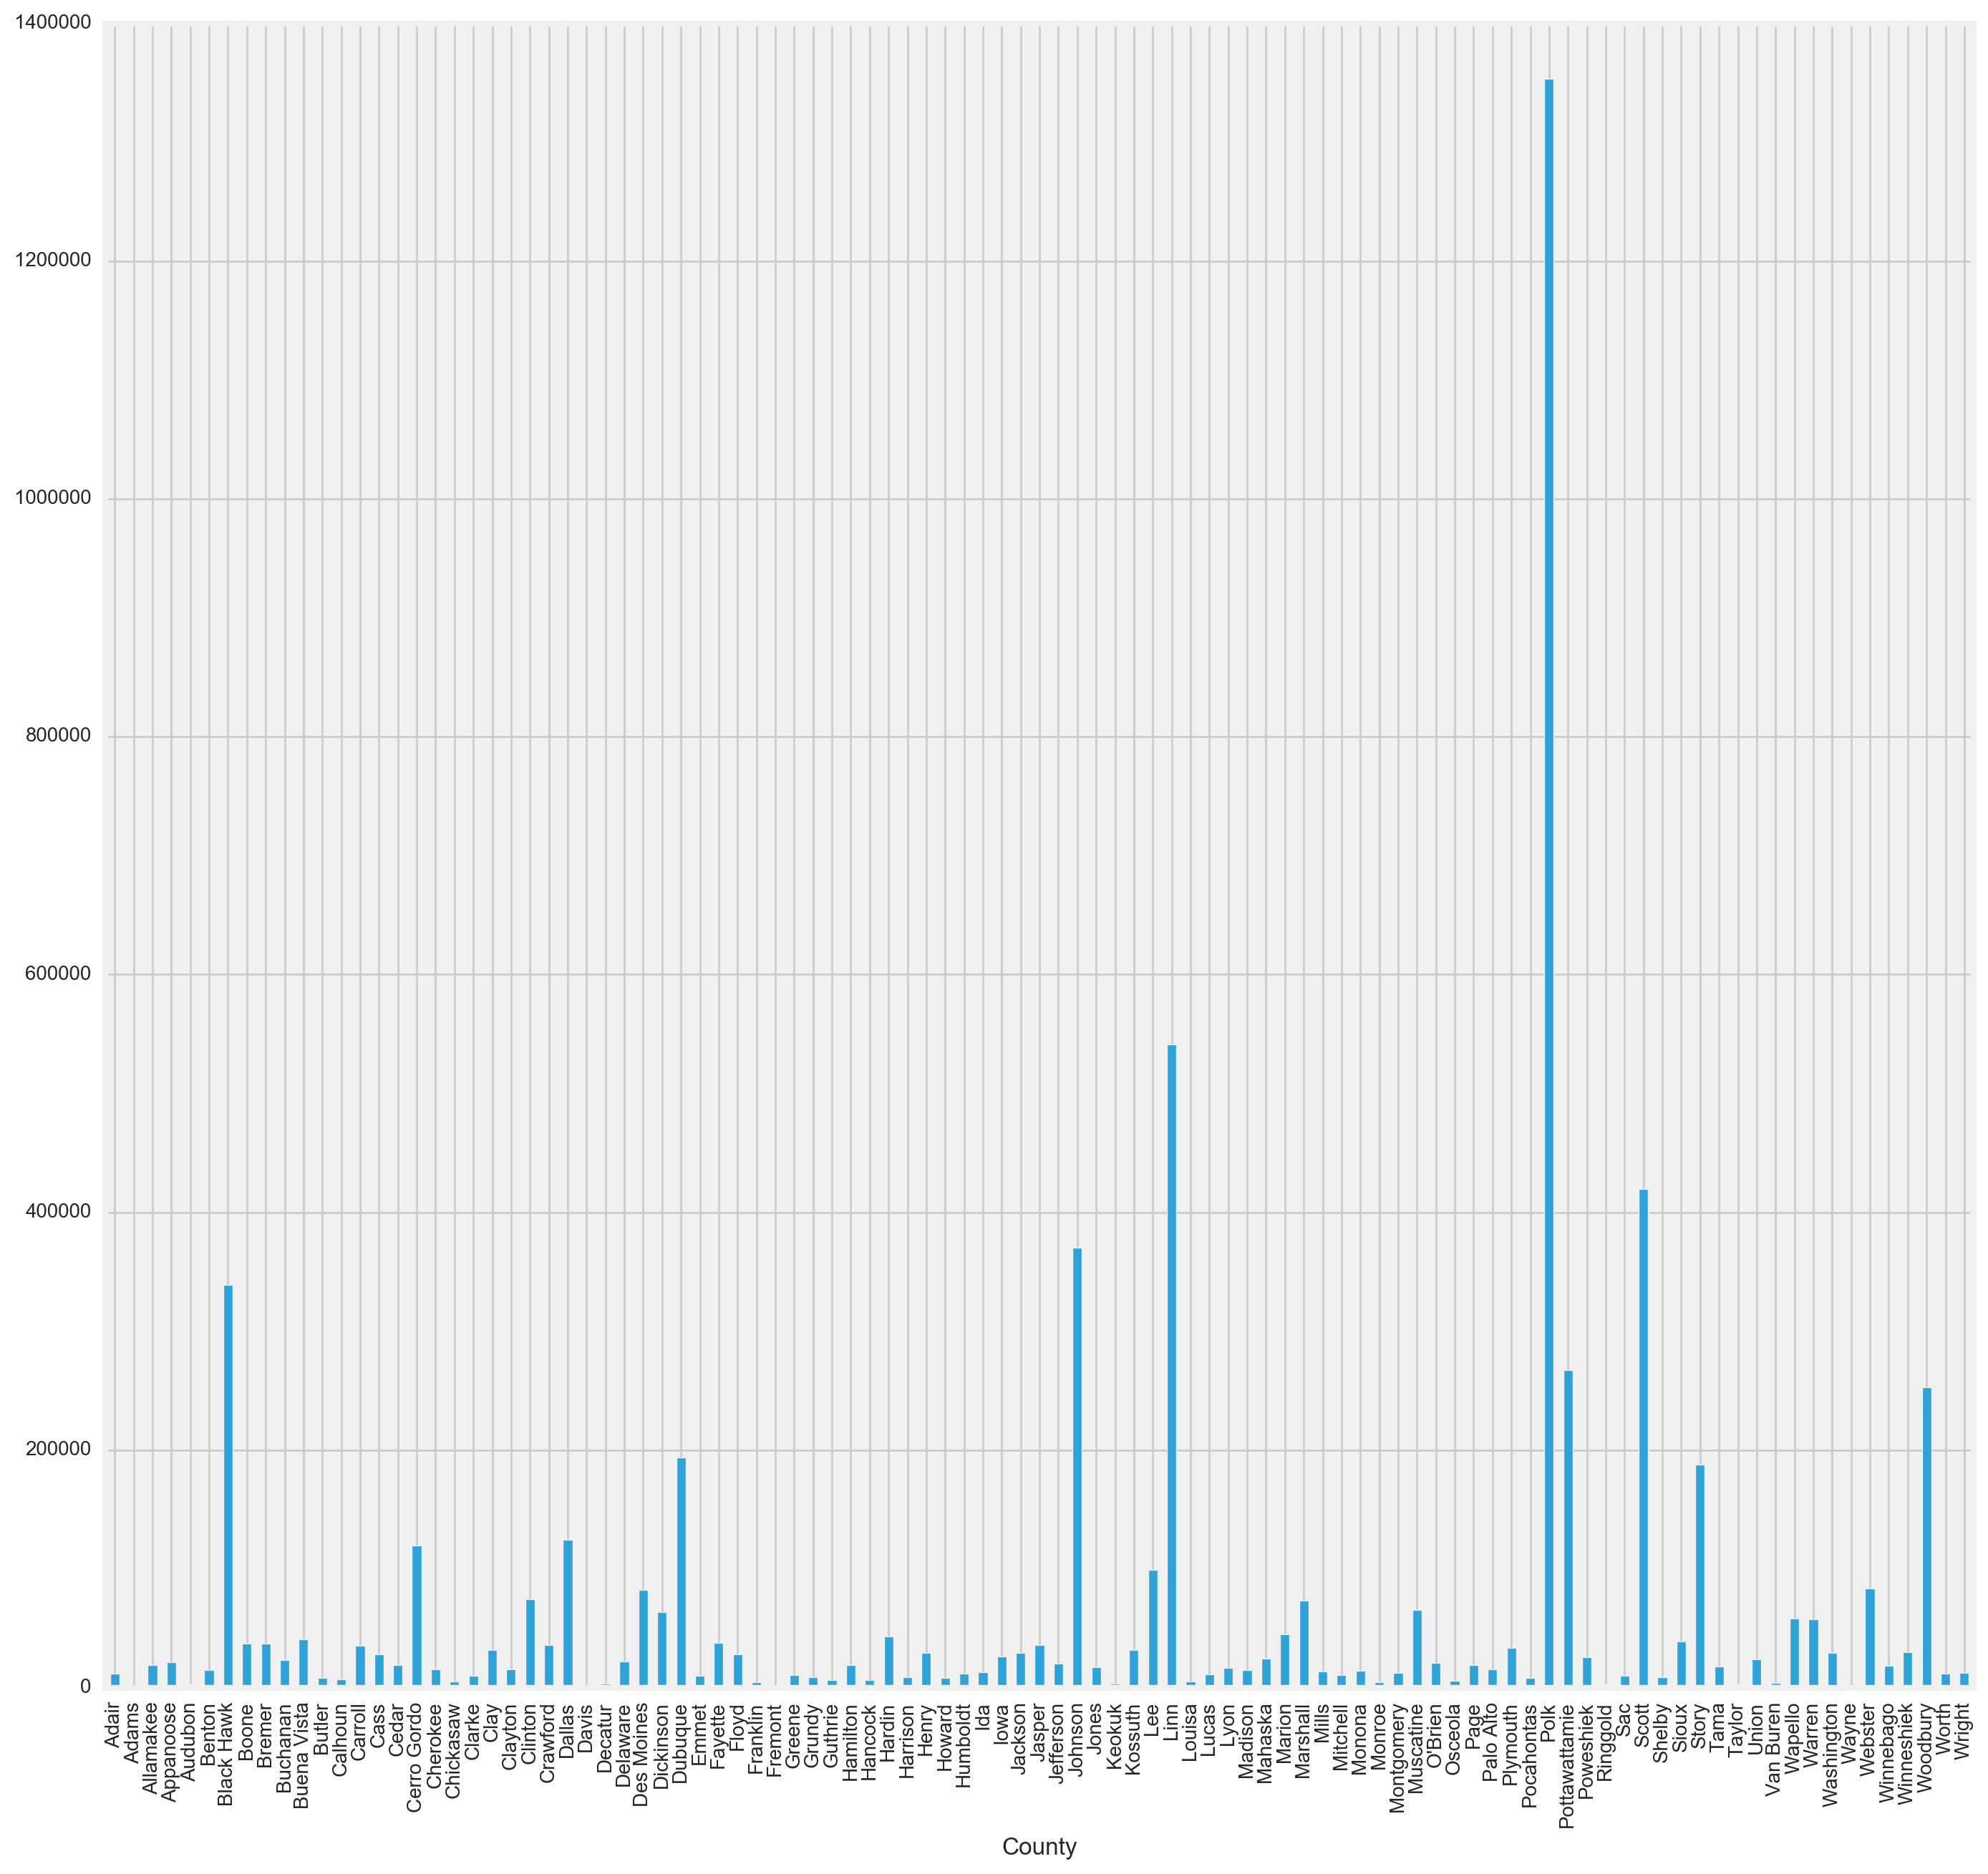

In [199]:
Sc2_2016 = iowa[(iowa['Date'] > '2016-1-1')  & (iowa['Date'] <'2016-3-31') ]

test2 = Sc2_2016.groupby(['County'])['Sale (Dollars)'].sum().reset_index()

Sc2_2016.groupby(['County'])['Sale (Dollars)'].sum().plot(kind='bar',figsize = (15,15));


In [200]:
test2.head()

,County,Sale (Dollars)
0,Adair,11834.16
1,Adams,2196.57
2,Allamakee,19106.29
3,Appanoose,21493.52
4,Audubon,3226.28


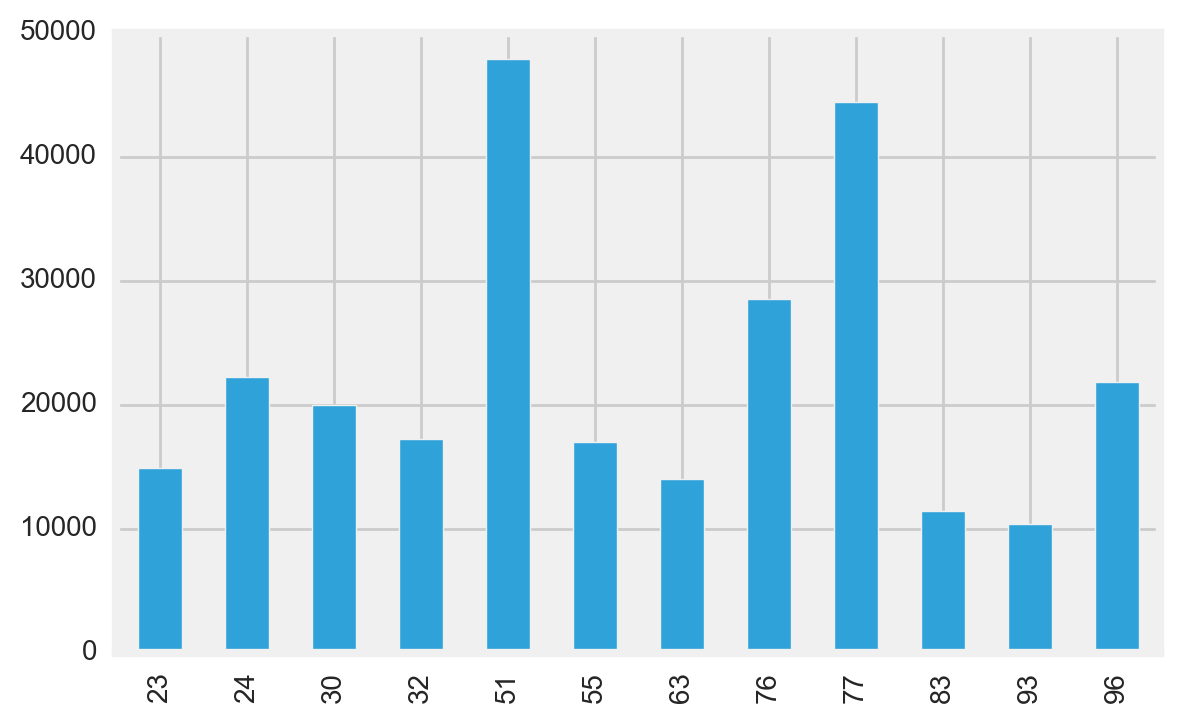

In [201]:
grwth = (test2['Sale (Dollars)']-test1['Sale (Dollars)'])

test1['Growth'] = grwth

test3 = test1[(test1['Growth']>10000)]

test3['Growth'].plot(kind='bar')

Johnson_Sales = iowa_2015[ (iowa_2015['County'] == 'Johnson') ]

Pottawattamie_Sales = iowa_2015[ (iowa_2015['County'] == 'Pottawattamie') ]


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

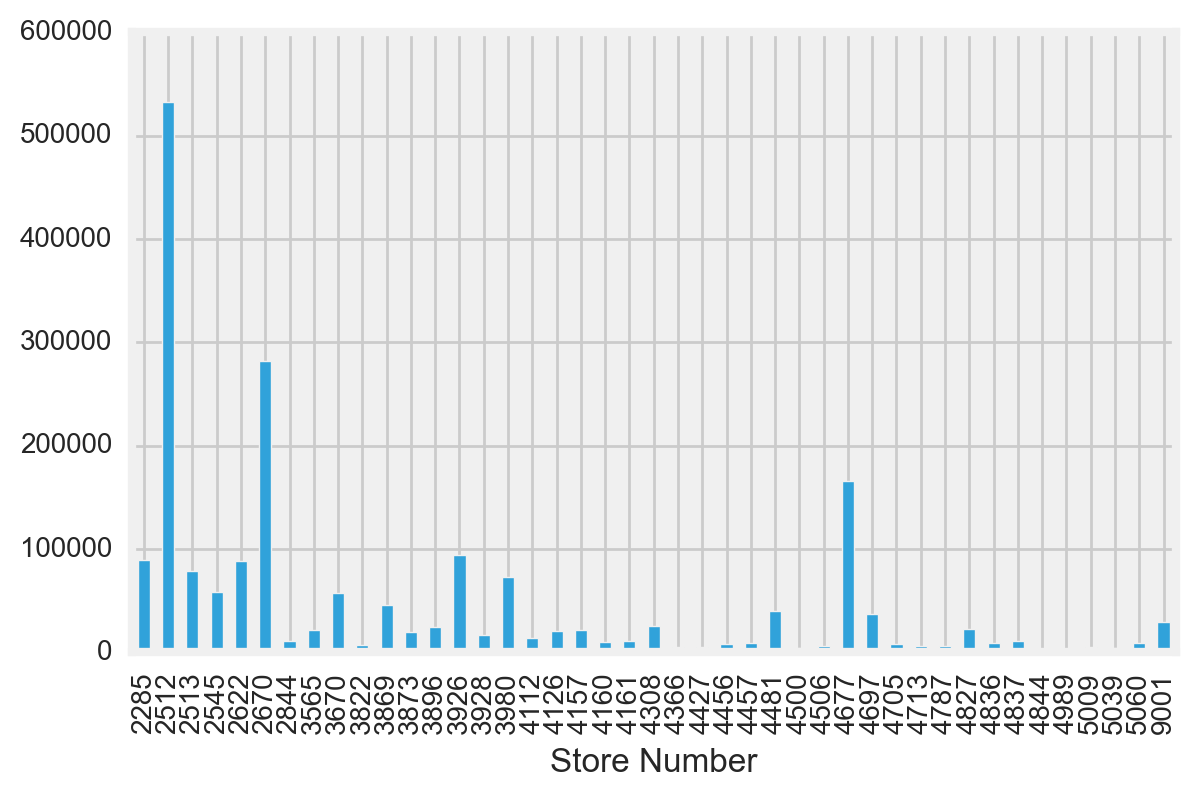

In [231]:
Johnson_Sales.groupby(['Store Number'])['Sale (Dollars)'].sum().plot(kind='bar')

Johnson_Sales.groupby(['Month'])['Sale (Dollars)'].sum().plot(kind='bar')

Johnson_Sales.groupby(['Larger_Category_Name'])['Sale (Dollars)'].sum().plot(kind='bar')

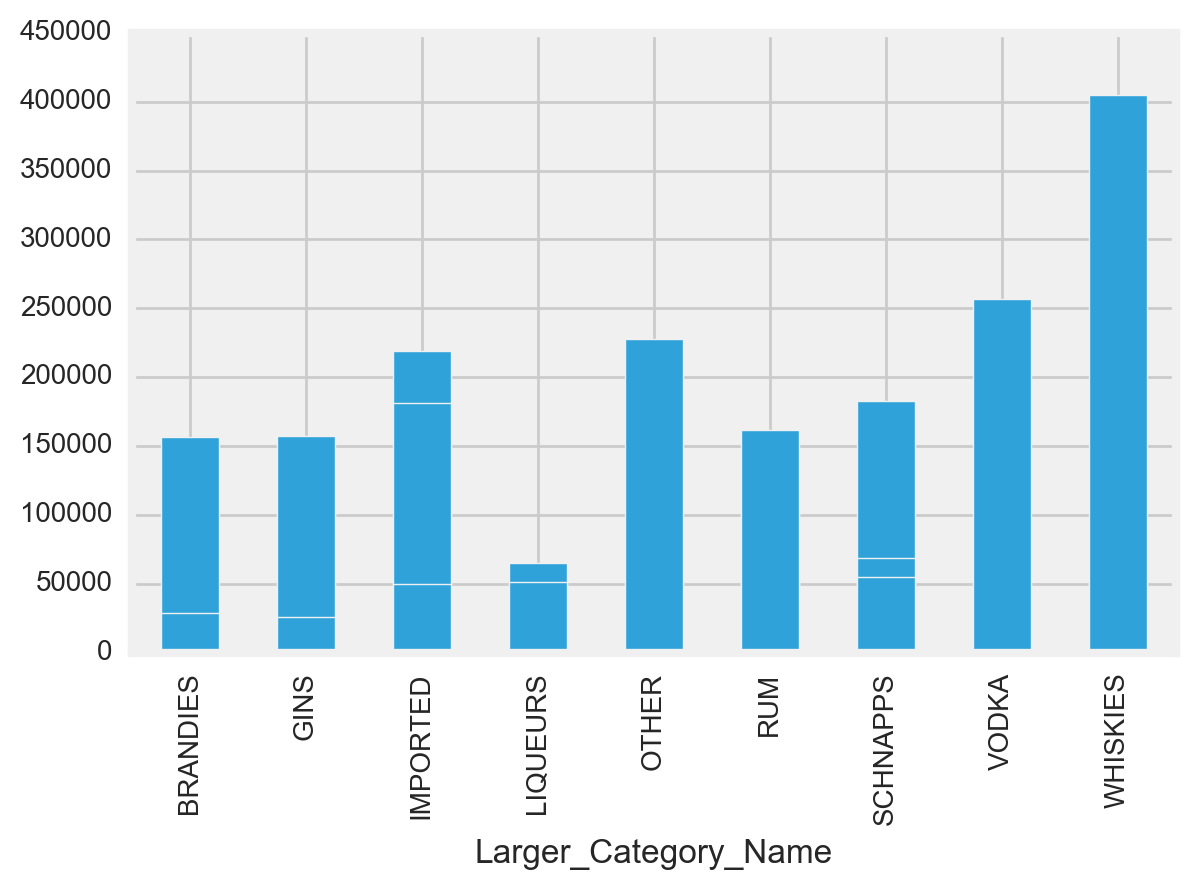

In [203]:
Pottawattamie_Sales.groupby(['Store Number'])['Sale (Dollars)'].sum().plot(kind='bar')

Pottawattamie_Sales.groupby(['Month'])['Sale (Dollars)'].sum().plot(kind='bar')

Pottawattamie_Sales.groupby(['Larger_Category_Name'])['Sale (Dollars)'].sum().plot(kind='bar')

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [204]:
'''

I do reccoment to open a store around Pottawattamie or Johnson county! and sell whisky and vodka 

and they sell it the most on March

'''

'\n\nI do reccoment to open a store around Pottawattamie or Johnson county! and sell whisky and vodka \n\nand they sell it the most on March\n\n'

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [205]:
'''

From the plot above, the best kind is Wiskiy and Vodka

'''

'\n\nFrom the plot above, the best kind is Wiskiy and Vodka\n\n'

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


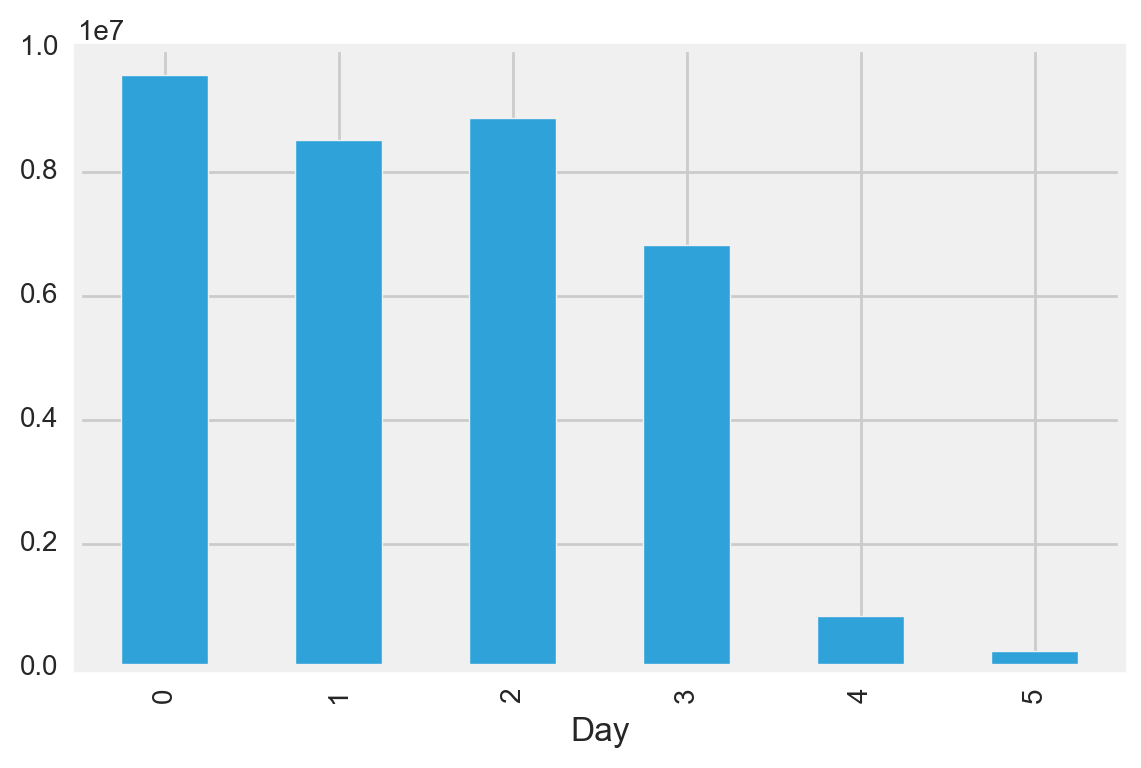

In [206]:
#iowa.groupby(['Month'])['Sale (Dollars)'].sum().plot(kind='bar')
iowa.head()
iowa.groupby(['Day'])['Sale (Dollars)'].sum().plot(kind='bar')

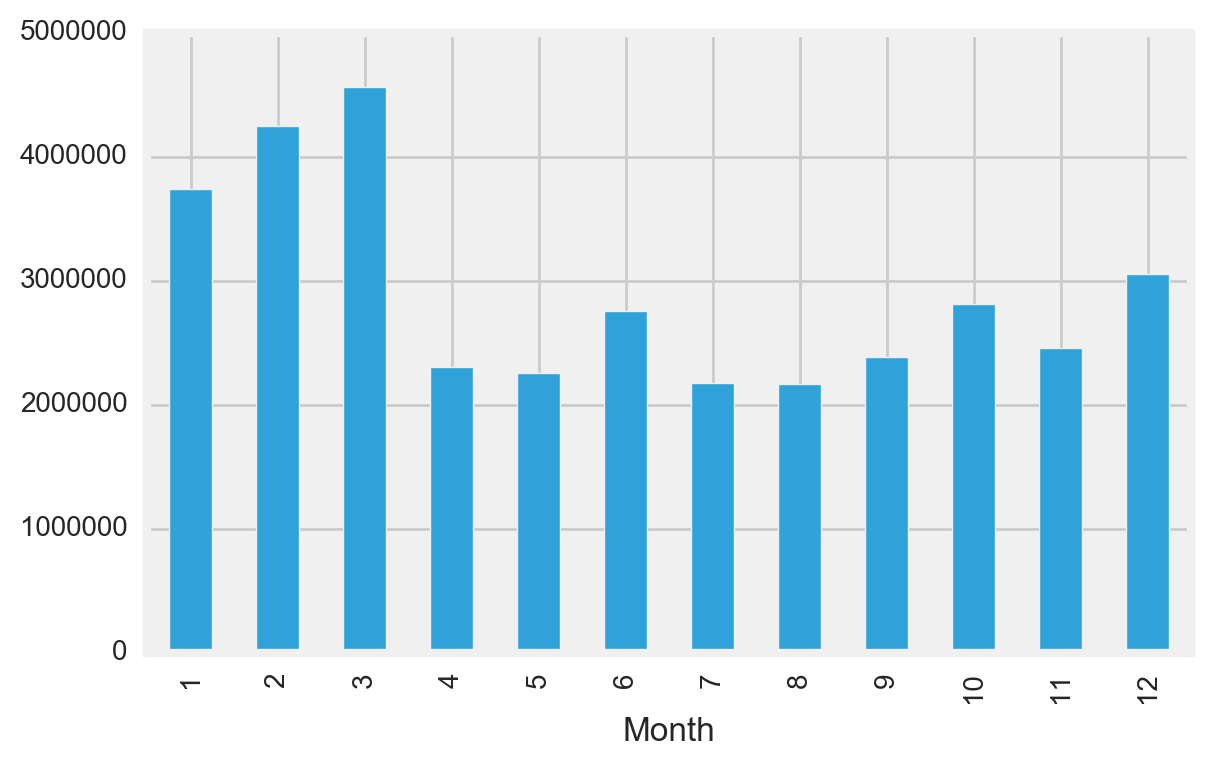

In [207]:
iowa.groupby(['Month'])['Sale (Dollars)'].sum().plot(kind='bar')

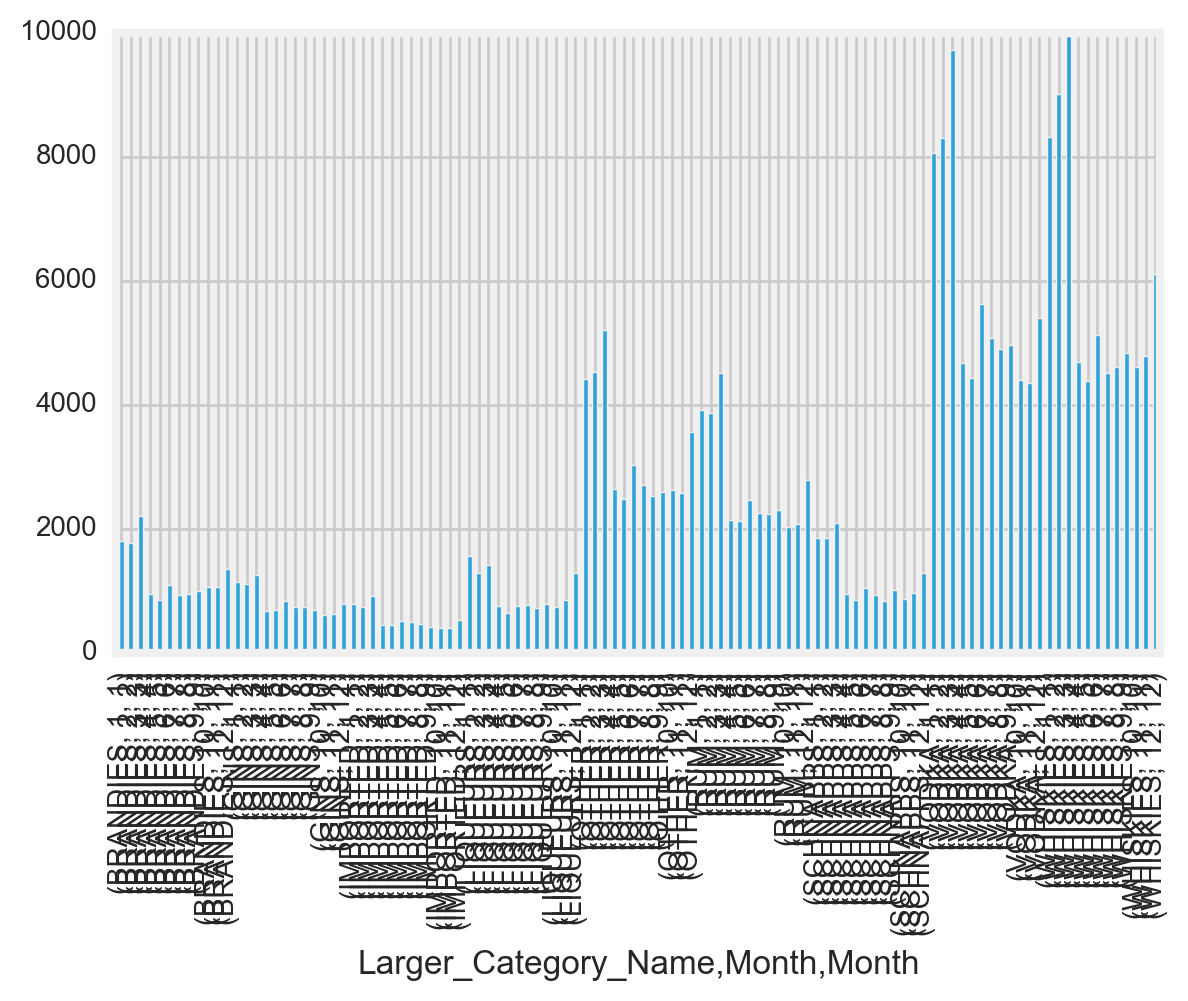

In [210]:
iowa.groupby(['Larger_Category_Name','Month'])['Month'].value_counts().plot(kind = 'bar')

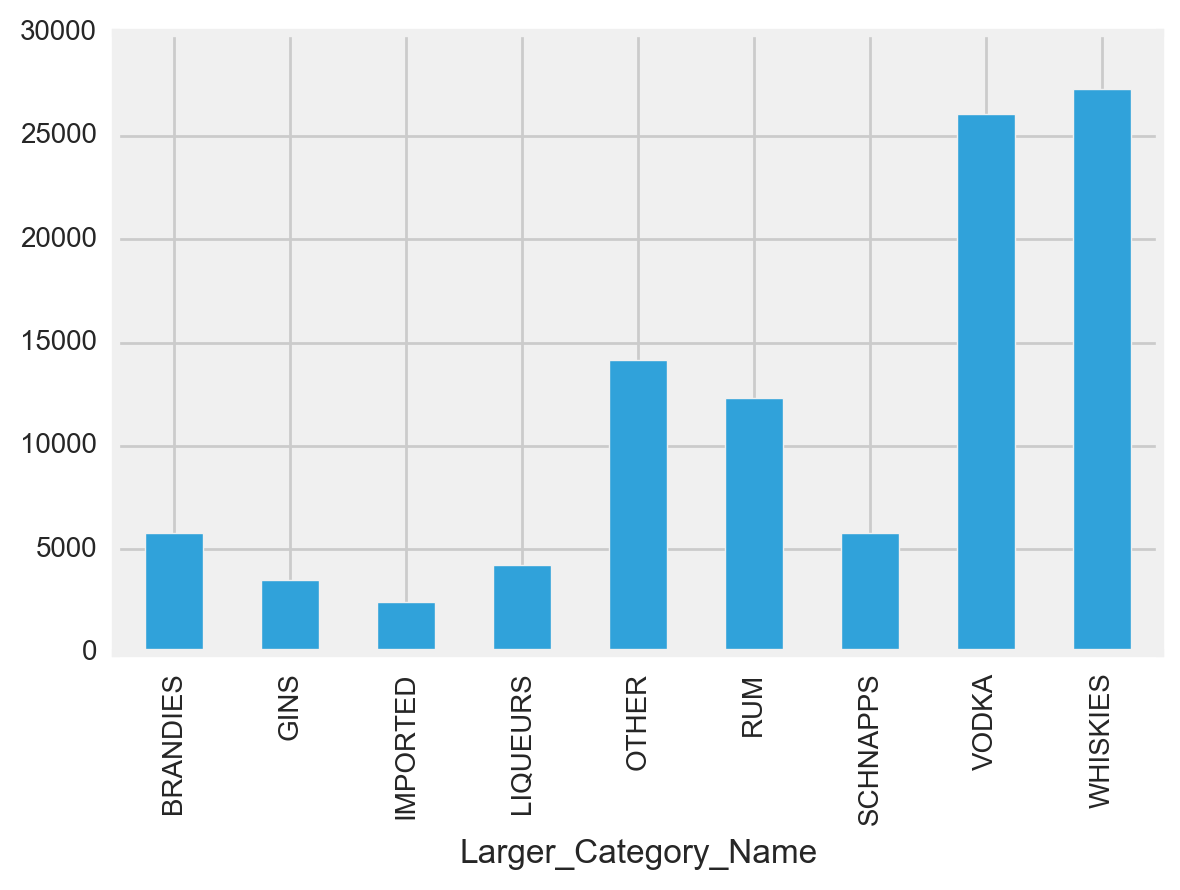

In [211]:
iowa[ (iowa['Month' ] == 1 ) | (iowa['Month' ] == 2 ) | (iowa['Month' ] == 3)].groupby(['Larger_Category_Name'])['Larger_Category_Name'].count().plot(kind = 'bar')

In [226]:
'''


 I would imagine that sales would 
 - Increase, During the summer,
 - Deacrease During Winter
 - Bear woild me more during summer



First quarter is best time of the year, vodka and whiskey is the most sold during that time, bear is not a good idea


'''


iowa.head()

,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Year,Month,Day,Larger_Category_Name
0,2015-11-04,3717,SUMNER,50674,Bremer,APRICOT BRANDIES,55,54436,750,4.50,6.75,12,81.00,2.38,2015,11,2,BRANDIES
1,2016-03-02,2614,DAVENPORT,52807,Scott,BLENDED WHISKIES,395,27605,750,13.75,20.63,2,41.26,0.40,2016,3,2,WHISKIES
2,2016-02-11,2106,CEDAR FALLS,50613,Black Hawk,STRAIGHT BOURBON WHISKIES,65,19067,1000,12.59,18.89,24,453.36,6.34,2016,2,3,WHISKIES
3,2016-02-03,2501,AMES,50010,Story,AMERICAN COCKTAILS,395,59154,1750,9.50,14.25,6,85.50,2.77,2016,2,2,OTHER
4,2015-08-18,3654,BELMOND,50421,Wright,VODKA 80 PROOF,297,35918,1750,7.20,10.80,12,129.60,5.55,2015,8,1,VODKA


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

In [229]:
### 20,000 Gallon is 75,708,236 ml

df_cost = iowa[ ( iowa['Larger_Category_Name'] == 'WHISKIES' ) ].sample(n=10000)

whiskey_cost_per_gallon = df_cost['State Bottle Cost'] * df_cost['Bottles Sold']/df_cost['Volume Sold (Gallons)']
avg_whiskey_cost_per_gallon = whiskey_cost_per_gallon.mean()
avg_whiskey_cost_per_gallon 

print avg_whiskey_cost_per_gallon*20000, "$ needed for 20,000 gallons of Whiskies"

1021494.82201 $ needed for 20,000 gallons of Whiskies


In [230]:
df_cost = iowa[ ( iowa['Larger_Category_Name'] == 'VODKA' ) ].sample(n=10000)

whiskey_cost_per_gallon = df_cost['State Bottle Cost'] * df_cost['Bottles Sold']/df_cost['Volume Sold (Gallons)']
avg_whiskey_cost_per_gallon = whiskey_cost_per_gallon.mean()
avg_whiskey_cost_per_gallon 

print avg_whiskey_cost_per_gallon*20000, "$ needed for 20,000 gallons of Vodka"

729699.093903 $ needed for 20,000 gallons of Vodka


In [252]:
sale_2512 = iowa[(iowa['Store Number'] == 2512)]
sale_2512 = sale_2512[ (sale_2512['Larger_Category_Name'] == 'WHISKIES')]
year_needed = sale_2512['Sale (Dollars)'].sum()

profit_made = sale_2512['Profit'].sum()

print round(1000000 / year_needed) , 'years needed to earn the money back!'


6.0 years needed to earn the money back!


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?

In [253]:
money_taken = 1150000



In [256]:
'''
Solve for:  
Where: r = (1/t)(A/P - 1)
Total P+I (A): $	
Principal (P): $	
Time (t):	 
Time Unit:
   
Answer:
'''

profit_total = 6 * profit_made

Total_Amount = 1000000 + profit_total 

Principal = 1000000

time = 6.

rate = (1/time)*(Total_Amount/Principal-1)

print 'Rate should be ',rate, 'to be able to pay on time!'




Rate should be  0.05592182 to be able to pay on time!
